In [15]:
import pandas as pd
import numpy as np


In [16]:
file_path = 'student-data.csv'
df = pd.read_csv(file_path)

In [17]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,passed
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,6,no
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,4,no
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,10,yes
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,2,yes
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,4,yes


In [18]:
df.shape

(395, 31)

In [19]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
passed        object
dtype: object

In [20]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
passed        0
dtype: int64

In [21]:
df.duplicated().sum()

0

In [22]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000


Задача в цьому випадку — класифікація, оскільки ми маємо цільову змінну passed, яка має два значення: "yes" або "no". Наступний крок — побудова 3 моделей для оцінки класифікації.

Реалізуємо такі моделі:

Логістична регресія.
Випадковий ліс (Random Forest).
K-Nearest Neighbors (KNN).

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Підготовка даних
df_encoded = df.copy()

# Перетворимо категоріальні змінні на числові
label_encoders = {}
for column in df_encoded.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le

# Визначимо вхідні характеристики (X) і цільову змінну (y)
X = df_encoded.drop('passed', axis=1)
y = df_encoded['passed']

# Розділимо дані на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Масштабування
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 1. Логістична регресія
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)
logreg_acc = accuracy_score(y_test, y_pred_logreg)

# 2. RandomForest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred_rf)

# 3. K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
knn_acc = accuracy_score(y_test, y_pred_knn)

# Виведення точності моделей
print(f"Точність логістичної регресії: {logreg_acc:.2%}")
print(f"Точність RandomForest: {rf_acc:.2%}")
print(f"Точність K-Nearest Neighbors: {knn_acc:.2%}")


Точність логістичної регресії: 71.43%
Точність RandomForest: 67.23%
Точність K-Nearest Neighbors: 63.87%


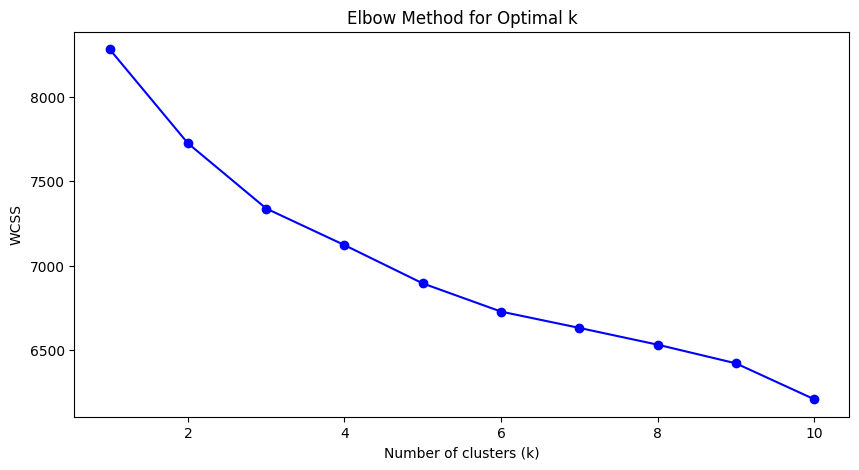

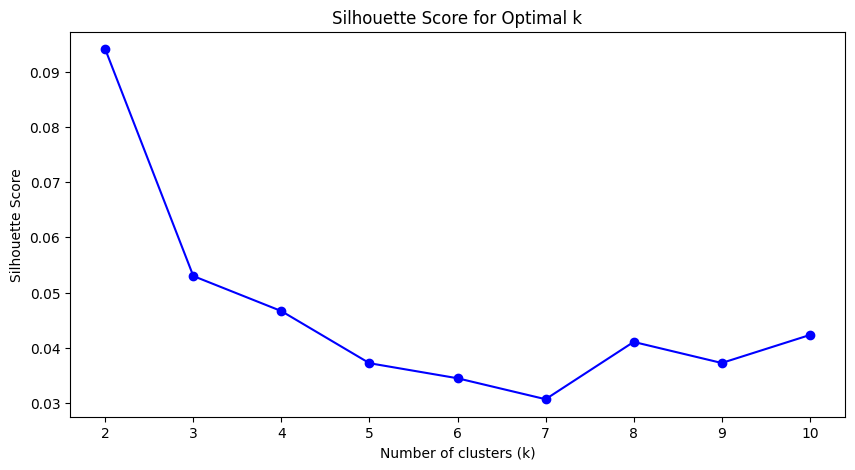

In [30]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Метод ліктя для визначення оптимальної кількості кластерів
wcss = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

silhouette_scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train_scaled)
    silhouette_scores.append(silhouette_score(X_train_scaled, kmeans.labels_))

# Візуалізація методу ліктя
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()

# Візуалізація силуетних оцінок
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), silhouette_scores, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal k')
plt.show()


За методом Ліктя оптимальна кількость кластерів = 3
За методом Силуетів оптимальна кількость кластерів = 2

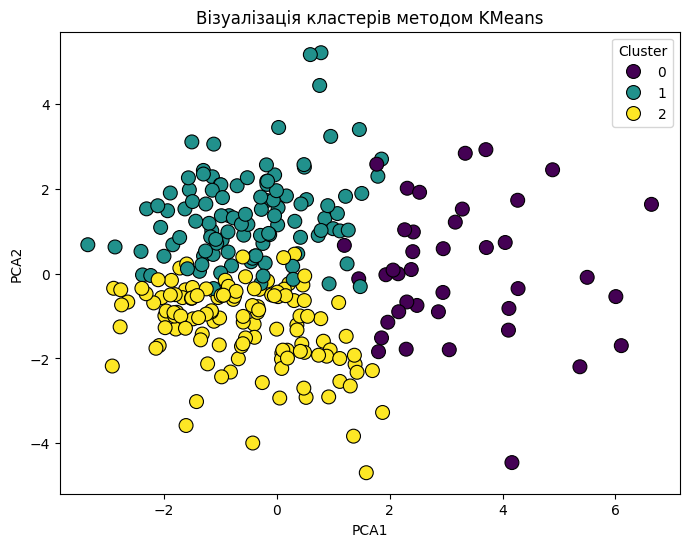

In [34]:
from sklearn.decomposition import PCA
import seaborn as sns

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_train_scaled)

# Використаємо PCA для зменшення вимірності до 2 компонент для візуалізації
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

# Створимо DataFrame для візуалізації
df_clusters = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
df_clusters['Cluster'] = clusters

# Візуалізація кластерів
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_clusters, x='PCA1', y='PCA2', hue='Cluster', palette='viridis', s=100, edgecolor='k')
plt.title('Візуалізація кластерів методом KMeans')
plt.show()


Результати демонструють чітке групування даних, що свідчить про успішне застосування алгоритму KMeans для кластеризації. 